In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
data_path = 'data'
file_name = 'BlackFriday.csv'
path_to_data_file = "/".join([data_path, file_name])

In [90]:
df = pd.read_csv(path_to_data_file)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [6]:
df.shape

(537577, 12)

In [7]:
male_count = sum(df.Gender == "M")
female_count = sum(df.Gender == "F")
total_count = df.shape[0]
print("Males :", male_count, ", {:.1f}%".format(100*(male_count / total_count)))
print("Females :", female_count, ", {:.1f}%".format(100*(female_count / total_count)))

Males : 405380 , 75.4%
Females : 132197 , 24.6%


In [35]:
age_ranges_string = df.Age.unique()
age_ints = []
for age_range in age_ranges_string:
    ages = re.findall(r'[0-9]+', age_range)
    age_ints.append(int(ages[0]))

sorted_age_ranges, age_ints = zip(*sorted(zip(age_ranges_string, age_ints)))
sorted_age_ranges = list(sorted_age_ranges)

In [36]:
print(sorted_age_ranges)

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [43]:
total_purchase_value = [sum(df.Purchase[df.Age == age_range]) for age_range in sorted_age_ranges]
plt.bar(sorted_age_ranges, total_purchase_value)
plt.ylabel("Total purchase value")
plt.xlabel("Age Ranges")
plt.show()

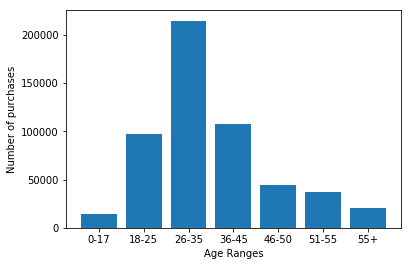

In [44]:
age_range_freq = [sum(df.Age == age_range) for age_range in sorted_age_ranges]
plt.bar(sorted_age_ranges, age_range_freq)
plt.ylabel("Number of purchases")
plt.xlabel("Age Ranges")
plt.show()

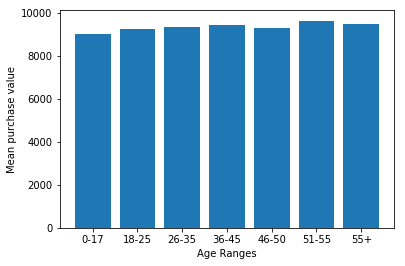

In [45]:
mean_purchase_value = [sum(df.Purchase[df.Age == age_range])/sum(df.Age == age_range) for age_range in sorted_age_ranges]
plt.bar(sorted_age_ranges, mean_purchase_value)
plt.ylabel("Mean purchase value")
plt.xlabel("Age Ranges")
plt.show()

There seems to be a similar mean purchase value, lets have a closer look at the purchase values distribution

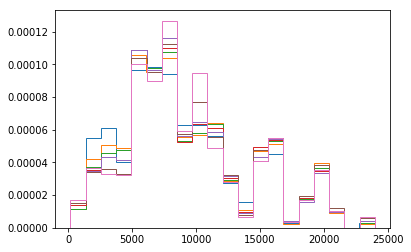

In [59]:
purchases_by_age = [df.Purchase[df.Age == age_range] for age_range in sorted_age_ranges]
for purchase_age_set in purchases_by_age:
    plt.hist(purchase_age_set, bins=20, histtype="step", density=True)
plt.show()

In [64]:
purchases_by_gender = [df.Purchase[df.Gender == gender] for gender in df.Gender.unique()]
for purchase_gender_set in purchases_by_gender:
    plt.hist(purchase_gender_set, histtype="step", density=True)
plt.show()

In [138]:
male_user_transactions = df[df.Gender == "M"].groupby("User_ID")["User_ID"].count()
female_user_transactions = df[df.Gender == "F"].groupby("User_ID")["User_ID"].count()
total = len(male_user_transactions + female_user_transactions)
print("{0} ({1:.2f}) male users ".format(len(male_user_transactions),len(male_user_transactions)/total))
print("{0} ({1:.2f}) female users".format(len(female_user_transactions),len(female_user_transactions)/total))

4225 (0.72) male users 
1666 (0.28) female users


In [120]:
users = df.User_ID.unique()
genders = [df.Gender[df.User_ID == user] for user in users]
print(len(users))

5891


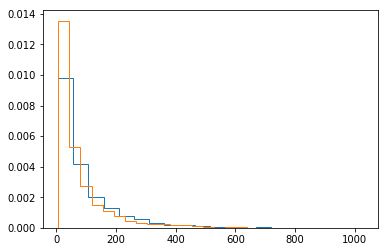

In [130]:
plt.hist(male_user_transactions, bins=20, histtype="step", density=True)
plt.hist(female_user_transactions, bins=20, histtype="step", density=True)
plt.show()